# ITERATION 4 DBAS

## 1. Situation Understanding
See on the report.

## 2. Data Understanding  

### 2.1 Initial Data Collection

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,DoubleType)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 18:17:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
data_schema_df1 = [StructField('Country/Region',StringType(),True),
                   StructField('Year',IntegerType(),True),
                   StructField('Value',DoubleType(),True)]
final_struct_df1 = StructType(fields=data_schema_df1)

df1 = spark.read.csv('ghg-emissions.csv', schema=final_struct_df1, header=True, inferSchema=True)
df2 = spark.read.csv('GLOBAL LAND-OCEAN TEMPERATURE INDEX.csv', header=True, inferSchema=True)
df3 = spark.read.csv('HDR Global Mean Sea Level Data.csv', header=True, inferSchema=True)
df4 = spark.read.csv('World Energy Overview.csv', header=True, inferSchema=True)
df5 = spark.read.csv('Global Data on Sustainable Energy (2000-2020).csv', header=True, inferSchema=True)

In [4]:
from pyspark.sql.functions import col
df1_null_value = df1.filter(col("Value").isNull())

In [3]:
df1.printSchema()
df2.printSchema()
df3.printSchema()
df4.printSchema()
df5.printSchema()

root
 |-- Country/Region: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: double (nullable = true)

root
 |-- Year: integer (nullable = true)
 |-- No_Smoothing: double (nullable = true)
 |-- Lowess: double (nullable = true)

root
 |-- HDR 1: integer (nullable = true)
 |-- HDR 2: integer (nullable = true)
 |-- HDR 3: double (nullable = true)
 |-- HDR 4: integer (nullable = true)
 |-- HDR 5: double (nullable = true)
 |-- HDR 6: double (nullable = true)
 |-- HDR 7: double (nullable = true)
 |-- HDR 8: double (nullable = true)
 |-- HDR 9: double (nullable = true)
 |-- HDR 10: double (nullable = true)
 |-- HDR 11: double (nullable = true)
 |-- HDR 12: double (nullable = true)
 |-- HDR 13: double (nullable = true)

root
 |-- Date: string (nullable = true)
 |-- Total Fossil Fuels Production: double (nullable = true)
 |-- Nuclear Electric Power Production: double (nullable = true)
 |-- Total Renewable Energy Production: double (nullable = true)
 |-- Total Primary Ener

In [4]:
df1.show()
df2.show()
df3.show()
df4.show()
df5.show()

+--------------+----+-------+
|Country/Region|Year|  Value|
+--------------+----+-------+
|         China|1981|1476.49|
|         China|1982|1606.59|
|         China|1983|1694.22|
|         China|1984|1844.83|
|         China|1985|1998.08|
|         China|1986|2104.21|
|         China|1987|2257.74|
|         China|1988|2425.89|
|         China|1989|2463.65|
|         China|1990|2484.85|
|         China|1991| 2606.1|
|         China|1992|2730.79|
|         China|1993|2921.65|
|         China|1994| 3100.0|
|         China|1995|3357.91|
|         China|1996|3503.23|
|         China|1997|3510.17|
|         China|1998|3360.46|
|         China|1999|3552.84|
|         China|2000|3644.46|
+--------------+----+-------+
only showing top 20 rows

+----+------------+------+
|Year|No_Smoothing|Lowess|
+----+------------+------+
|1880|       -0.17|  -0.1|
|1881|       -0.09| -0.13|
|1882|       -0.11| -0.17|
|1883|       -0.17|  -0.2|
|1884|       -0.28| -0.24|
|1885|       -0.33| -0.26|
|1886|     

+-----------+----+---------------------------------------+---------------------------------+----------------------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------+--------------------------------------------------+-----------------------------------------------------------+---------------------------------+----------------------------------------+-----------+--------------+----------------+--------------+--------+---------+
|     Entity|Year|Access to electricity (% of population)|Access to clean fuels for cooking|Renewable-electricity-generating-capacity-per-capita|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity fr

2.2 See on the report.

### 2.3 Data Exploration

In [5]:
import matplotlib.pyplot as plt

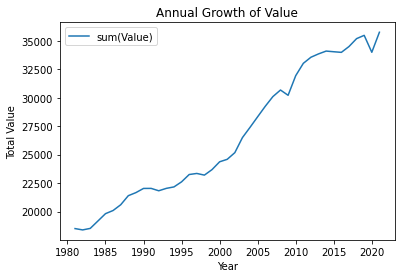

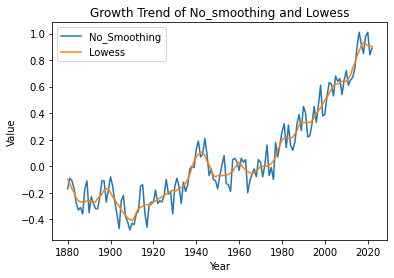

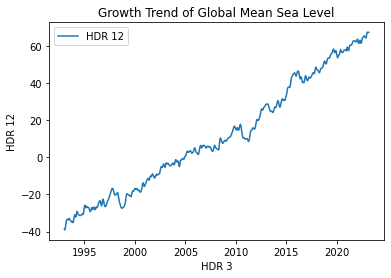

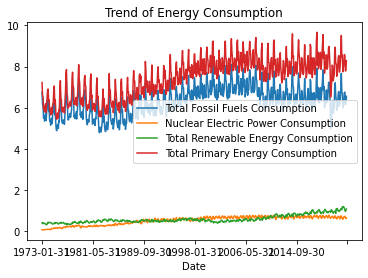

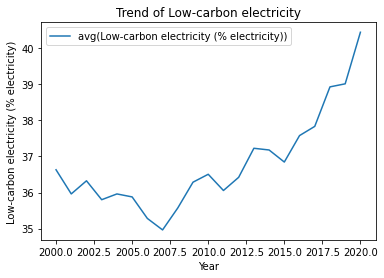

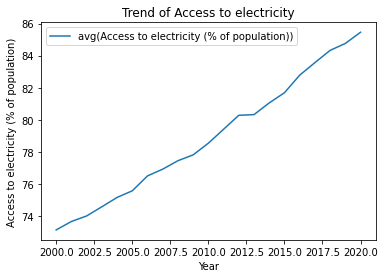

In [6]:
df1_pandas = df1.groupBy('Year').sum('Value').toPandas().sort_values('Year')
df1_pandas.plot(x='Year', y='sum(Value)', kind='line', title='Annual Growth of Value', xlabel='Year', ylabel='Total Value')
plt.show()

df2_pandas = df2.toPandas().set_index('Year')
df2_pandas[['No_Smoothing', 'Lowess']].plot(kind='line', title='Growth Trend of No_smoothing and Lowess', xlabel='Year', ylabel='Value')
plt.show()

df3_pandas = df3.toPandas().set_index('HDR 3')
df3_pandas[['HDR 12']].plot(kind='line', title='Growth Trend of Global Mean Sea Level', xlabel='HDR 3', ylabel='HDR 12')
plt.show()

df4_pandas = df4.toPandas().set_index('Date')
df4_pandas[['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption', 'Total Renewable Energy Consumption', 'Total Primary Energy Consumption']].plot(kind='line', title='Trend of Energy Consumption', xlabel='Date')
plt.show()

df5_group1 = df5.groupBy('Year').avg('Low-carbon electricity (% electricity)').toPandas().sort_values('Year')
df5_group1.plot(x='Year', y='avg(Low-carbon electricity (% electricity))', kind='line', title='Trend of Low-carbon electricity', xlabel='Year', ylabel='Low-carbon electricity (% electricity)')
plt.show()

df5_group2 = df5.groupBy('Year').avg('Access to electricity (% of population)').toPandas().sort_values('Year')
df5_group2.plot(x='Year', y='avg(Access to electricity (% of population))', kind='line', title='Trend of Access to electricity', xlabel='Year', ylabel='Access to electricity (% of population)')
plt.show()

### 2.4 Data Quality

In [7]:
from pyspark.sql import functions as F
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', 10)  # Adjust the max column width for better visibility

def analyze_data_spark(df):
    # Number of NaN values for each column
    print("Number of NaN values for each column:")
    nan_counts = df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()
    display(nan_counts)  # Use display instead of print for better formatting in Jupyter

    print()
    
    # Outliers and Extremes
    for column in df.columns:
        if str(df.schema[column].dataType) in ['IntegerType', 'DoubleType', 'FloatType']:
            mean_std = df.select(F.mean(F.col(column)).alias('mean'), F.stddev(F.col(column)).alias('std')).collect()[0]
            mean = mean_std['mean']
            std = mean_std['std']
            
            outliers = df.filter((F.col(column) < mean - 5*std) | (F.col(column) > mean + 5*std)).count()
            print(f"Number of outliers for {column}: {outliers}")
            
            extremes = df.filter((F.col(column) < mean - 3*std) | (F.col(column) > mean + 3*std)).count()
            print(f"Number of extremes for {column}: {extremes}")
    
    print("===================================")

In [8]:
# Global Historical GHG Emissions
desc_stats = df1.describe().toPandas()
display(desc_stats)
analyze_data_spark(df1)

# Global Land-Ocean Temperature Index
desc_stats = df2.describe().toPandas()
display(desc_stats)
analyze_data_spark(df2)

# Global Mean Sea Level Data
desc_stats = df3.describe().toPandas()
display(desc_stats)
analyze_data_spark(df3)

# World Energy Overview
desc_stats = df4.describe().toPandas()
display(desc_stats)
analyze_data_spark(df4)

# Global Data on Sustainable Energy (2000-2020)
desc_stats = df5.describe().toPandas()
display(desc_stats)
analyze_data_spark(df5)

,summary,Country/Region,Year,Value
0,count,7913,7913,7791
1,mean,None,2001.0,139.95...
2,stddev,None,11.832...,639.05...
3,min,Afghan...,1981,0.0
4,max,Zimbabwe,2021,11472.37


Number of NaN values for each column:


,Country/Region,Year,Value
0,0,0,122



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Value: 68
Number of extremes for Value: 96


,summary,Year,No_Smoothing,Lowess
0,count,143,143,143
1,mean,1951.0,0.0609...,0.0604...
2,stddev,41.424...,0.3673...,0.3551...
3,min,1880,-0.48,-0.41
4,max,2022,1.01,0.93


Number of NaN values for each column:


,Year,No_Smoothing,Lowess
0,0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for No_Smoothing: 0
Number of extremes for No_Smoothing: 0
Number of outliers for Lowess: 0
Number of extremes for Lowess: 0


,summary,HDR 1,HDR 2,HDR 3,HDR 4,HDR 5,HDR 6,HDR 7,HDR 8,HDR 9,HDR 10,HDR 11,HDR 12,HDR 13
0,count,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
1,mean,26.975...,566.54...,2008.0...,449081...,327043...,7.6036...,87.094...,7.6577...,11.279...,87.155...,11.332...,11.344...,7.6689...
2,stddev,162.00...,321.29...,8.7223...,38216....,27352....,28.334...,5.4136...,28.166...,30.417...,5.4510...,30.257...,30.044...,27.942...
3,min,0,11,1993.0...,1287,906.1,-44.45,77.19,-39.8,-43.2,77.19,-39.8,-39.09,-39.1
4,max,999,1122,2023.1...,472090,341334.09,64.67,118.75,63.31,71.94,118.79,70.58,67.39,60.09


Number of NaN values for each column:


,HDR 1,HDR 2,HDR 3,HDR 4,HDR 5,HDR 6,HDR 7,HDR 8,HDR 9,HDR 10,HDR 11,HDR 12,HDR 13
0,0,0,0,0,0,0,0,0,0,0,0,0,0



Number of outliers for HDR 1: 30
Number of extremes for HDR 1: 30
Number of outliers for HDR 2: 0
Number of extremes for HDR 2: 0
Number of outliers for HDR 3: 0
Number of extremes for HDR 3: 0
Number of outliers for HDR 4: 13
Number of extremes for HDR 4: 22
Number of outliers for HDR 5: 12
Number of extremes for HDR 5: 23
Number of outliers for HDR 6: 0
Number of extremes for HDR 6: 0
Number of outliers for HDR 7: 6
Number of extremes for HDR 7: 25
Number of outliers for HDR 8: 0
Number of extremes for HDR 8: 0
Number of outliers for HDR 9: 0
Number of extremes for HDR 9: 0
Number of outliers for HDR 10: 6
Number of extremes for HDR 10: 25
Number of outliers for HDR 11: 0
Number of extremes for HDR 11: 0
Number of outliers for HDR 12: 0
Number of extremes for HDR 12: 0
Number of outliers for HDR 13: 0
Number of extremes for HDR 13: 0


,summary,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,count,599,599,599,599,599,599,599,599,599,599,599,599,599
1,mean,None,5.0346...,0.5195...,0.5937...,6.1479...,1.8734...,0.6117...,1.2617...,0.0318...,6.3213...,0.5195...,0.5916...,7.4414...
2,stddev,None,0.6101...,0.2026...,0.1933...,0.8950...,0.5612...,0.5445...,0.7249...,0.4766...,0.7083...,0.2026...,0.1892...,0.9468...
3,min,1973-0...,3.676065,0.062111,0.304328,4.3068,0.710558,0.056798,-0.554743,-0.894627,4.78391,0.062111,0.304328,5.435627
4,max,2022-1...,7.126618,0.780456,1.21879,8.810077,3.14964,2.386337,2.741692,1.551345,8.096323,0.780456,1.199383,9.664299


Number of NaN values for each column:


,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,0,0,0,0,0,0,0,0,0,0,0,0,0



Number of outliers for Total Fossil Fuels Production: 0
Number of extremes for Total Fossil Fuels Production: 11
Number of outliers for Nuclear Electric Power Production: 0
Number of extremes for Nuclear Electric Power Production: 0
Number of outliers for Total Renewable Energy Production: 0
Number of extremes for Total Renewable Energy Production: 4
Number of outliers for Total Primary Energy Production: 0
Number of extremes for Total Primary Energy Production: 0
Number of outliers for Primary Energy Imports: 0
Number of extremes for Primary Energy Imports: 0
Number of outliers for Primary Energy Exports: 0
Number of extremes for Primary Energy Exports: 9
Number of outliers for Primary Energy Net Imports: 0
Number of extremes for Primary Energy Net Imports: 0
Number of outliers for Primary Energy Stock Change and Other: 0
Number of extremes for Primary Energy Stock Change and Other: 1
Number of outliers for Total Fossil Fuels Consumption: 0
Number of extremes for Total Fossil Fuels C

,summary,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,count,3649,3649,3639,3480,2718,1560,3455,3628,3523,3628,3607,3649,3442,3221,1512,3332,3367,3648,3648,3648,3648
1,mean,None,2010.0...,78.933...,63.255...,113.13...,9.4224E7,32.638...,70.365...,13.450...,23.968...,36.801...,25743....,5.3073...,159866...,11.986...,3.4416...,13283....,141.03...,436.35,18.246...,14.822...
2,stddev,None,6.0542...,30.275...,39.043...,244.16...,2.9815...,29.894...,348.05...,73.006...,104.43...,34.314...,34773....,3.5320...,773661...,14.994...,5.6867...,19709....,169.22...,262.20...,24.159...,66.348...
3,min,Afghan...,2000,1.2522693,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,9.9999...,0.0,-62.07...,111.92...,"1,265","1,03,000",-40.90...,-175.1...
4,max,Zimbabwe,2020,100.0,100.0,3060.19,520231...,96.04,5184.13,809.41,2184.94,100.00001,262585.7,32.57,1.0707...,86.836586,123.13...,123514...,99,"99,84,670",64.963051,178.06...


Number of NaN values for each column:


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,0,0,10,169,931,2089,194,21,126,21,42,0,207,428,2137,317,282,1,1,1,1



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Access to electricity (% of population): 0
Number of extremes for Access to electricity (% of population): 0
Number of outliers for Access to clean fuels for cooking: 0
Number of extremes for Access to clean fuels for cooking: 0
Number of outliers for Renewable-electricity-generating-capacity-per-capita: 22
Number of extremes for Renewable-electricity-generating-capacity-per-capita: 42
Number of outliers for Renewable energy share in the total final energy consumption (%): 0
Number of extremes for Renewable energy share in the total final energy consumption (%): 0
Number of outliers for Electricity from fossil fuels (TWh): 37
Number of extremes for Electricity from fossil fuels (TWh): 46
Number of outliers for Electricity from nuclear (TWh): 41
Number of extremes for Electricity from nuclear (TWh): 56
Number of outliers for Electricity from renewables (TWh): 20
Number of extremes for Electricity from 

## 3. Data Preparation

## 3.1 Data Selection

In [9]:
df1_shows = df1.toPandas()
display(df1_shows)

,Country/Region,Year,Value
0,China,1981,1476.49
1,China,1982,1606.59
2,China,1983,1694.22
3,China,1984,1844.83
4,China,1985,1998.08
...,...,...,...
7908,Tuvalu,2017,0.01
7909,Tuvalu,2018,0.01
7910,Tuvalu,2019,0.01
7911,Tuvalu,2020,0.01


In [10]:
df2 = df2.drop('No_Smoothing')
df2_shows = df2.toPandas()
display(df2_shows)

,Year,Lowess
0,1880,-0.10
1,1881,-0.13
2,1882,-0.17
3,1883,-0.20
4,1884,-0.24
...,...,...
138,2018,0.93
139,2019,0.92
140,2020,0.91
141,2021,0.91


In [11]:
selected_columns_df3 = ['HDR 3', 'HDR 12']
df3 = df3.select(*selected_columns_df3)
# Rename columns in df4
df3 = df3.withColumnRenamed('HDR 3', 'Year+').withColumnRenamed('HDR 12', 'Smoothed GMSL Variation (mm)')

df3_shows = df3.toPandas()
display(df3_shows)

,Year+,Smoothed GMSL Variation (mm)
0,1993.0...,-38.56
1,1993.0...,-39.09
2,1993.0...,-38.56
3,1993.0...,-38.32
4,1993.1...,-37.20
...,...,...
1106,2023.0...,67.28
1107,2023.0...,67.23
1108,2023.1...,67.24
1109,2023.1...,67.28


In [12]:
df4 = df4.drop('Primary Energy Imports',
               'Primary Energy Exports',
               'Primary Energy Net Imports',
               'Primary Energy Stock Change and Other')

df4_shows = df4.toPandas()
display(df4_shows)

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-0...,4.932632,0.068103,0.403981,5.404715,6.747651,0.068103,0.403981,7.223873
1,1973-0...,4.729582,0.064634,0.360900,5.155115,6.163095,0.064634,0.360900,6.592366
2,1973-0...,4.946902,0.072494,0.400161,5.419556,6.044647,0.072494,0.400161,6.521439
3,1973-0...,4.716271,0.064070,0.380470,5.160812,5.493184,0.064070,0.380470,5.941729
4,1973-0...,4.956995,0.062111,0.392141,5.411246,5.613551,0.062111,0.392141,6.071940
...,...,...,...,...,...,...,...,...,...
594,2022-0...,6.921426,0.718109,1.132400,8.771935,6.736891,0.718109,1.111161,8.584805
595,2022-0...,7.047525,0.718526,1.044026,8.810077,6.755154,0.718526,1.036589,8.530444
596,2022-0...,6.915201,0.664673,0.978647,8.558521,6.144280,0.664673,0.960694,7.782741
597,2022-1...,7.126618,0.614741,1.019209,8.760568,6.179721,0.614741,1.006859,7.811175


In [13]:
df5 = df5.drop('Financial flows to developing countries (US $)', 
                'Value_co2_emissions_kt_by_country', 
                'Renewables (% equivalent primary energy)', 
                'gdp_growth', 
                'gdp_per_capita', 
                r'Density\n(P/Km2)', 
                'Land Area(Km2)')

df5_shows = df5.toPandas()
display(df5_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude
0,Afghan...,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,33.939110,67.709953
1,Afghan...,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,33.939110,67.709953
2,Afghan...,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,33.939110,67.709953
3,Afghan...,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,33.939110,67.709953
4,Afghan...,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.6...,10.00,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.0...,9.51,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.9...,9.83,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.6...,10.47,-19.015438,29.154857


## 3.2 Constructing/Deriving a New Feature

In [14]:
from pyspark.sql import functions as F

In [15]:
df4 = df4.withColumn("Date", F.to_date("Date"))
df4 = df4.withColumn("Year", F.year("Date")).drop("Date", "sum(Year)")
df4 = df4.groupBy("Year").sum()
df4 = df4.orderBy("Year")
df4 = df4.withColumnRenamed("sum(Total Fossil Fuels Production)", "Total Fossil Fuels Production") \
         .withColumnRenamed("sum(Nuclear Electric Power Production)", "Nuclear Electric Power Production") \
         .withColumnRenamed("sum(Total Renewable Energy Production)", "Total Renewable Energy Production") \
         .withColumnRenamed("sum(Total Primary Energy Production)", "Total Primary Energy Production") \
         .withColumnRenamed("sum(Total Fossil Fuels Consumption)", "Total Fossil Fuels Consumption") \
         .withColumnRenamed("sum(Nuclear Electric Power Consumption)", "Nuclear Electric Power Consumption") \
         .withColumnRenamed("sum(Total Renewable Energy Consumption)", "Total Renewable Energy Consumption") \
         .withColumnRenamed("sum(Total Primary Energy Consumption)", "Total Primary Energy Consumption")

df4_shows = df4.toPandas()
display(df4_shows)

,Year,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,sum(Year)
0,1973,58.209277,0.910178,4.410937,63.530389,70.282079,0.910178,4.410937,75.651910,23676
1,1974,56.294375,1.272084,4.741852,62.308310,67.871940,1.272084,4.741852,73.929185,23688
2,1975,54.696533,1.899797,4.687121,61.283451,65.323405,1.899797,4.687121,71.931428,23700
3,1976,54.684224,2.111119,4.727150,61.522497,69.070873,2.111119,4.727150,75.938523,23712
4,1977,55.062617,2.701763,4.208967,61.973344,70.950267,2.701763,4.208967,77.920418,23724
5,1978,55.030740,3.024125,5.005441,63.060304,71.809332,3.024125,5.005441,79.906218,23736
6,1979,57.952451,2.775826,5.122854,65.851131,72.844236,2.775826,5.122854,80.812299,23748
7,1980,58.979988,2.739169,5.428342,67.147498,69.779558,2.739169,5.428342,78.018467,23760
8,1981,58.487963,3.007592,5.413688,66.909242,67.518799,3.007592,5.413688,76.053482,23772
9,1982,57.415860,3.131149,5.979637,66.526645,63.835902,3.131149,5.979637,73.046713,23784


In [16]:
df3 = df3.withColumn("Year", F.col("Year+").cast("int")).drop("Year+")
df3 = df3.groupBy("Year").agg(F.mean("Smoothed GMSL Variation (mm)").alias("Smoothed GMSL Variation (mm)"))
df3 = df3.orderBy("Year")

df3_shows = df3.toPandas()
display(df3_shows)

,Year,Smoothed GMSL Variation (mm)
0,1993,-34.528108
1,1994,-30.551892
2,1995,-27.375405
3,1996,-25.304722
4,1997,-21.271622
5,1998,-23.648649
6,1999,-20.035946
7,2000,-16.786757
8,2001,-11.212432
9,2002,-7.076111


In [17]:
df1_mean_value = df1.agg(F.mean("Value")).collect()[0][0]
df1 = df1.withColumn("Emission_Value", F.when(F.col("Value").isNull(), df1_mean_value).otherwise(F.col("Value"))).drop("Value")
df1 = df1.groupBy("Year").agg(F.sum("Emission_Value").alias("Emission_Value"))
df1 = df1.orderBy("Year")

df1_shows = df1.toPandas()
display(df1_shows)

,Year,Emission_Value
0,1981,20049....
1,1982,19932....
2,1983,20066....
3,1984,20710....
4,1985,21358....
5,1986,21636....
6,1987,22140....
7,1988,22937....
8,1989,23207....
9,1990,22874....


In [18]:
df5 = df5.withColumn("Clean Energy Development Index", 
                     (F.col("Renewable energy share in the total final energy consumption (%)") * 0.5 
                      + F.col("Low-carbon electricity (% electricity)") * 0.5))
df5_shows = df5.toPandas()
display(df5_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude,Clean Energy Development Index
0,Afghan...,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,33.939110,67.709953,55.473720
1,Afghan...,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,33.939110,67.709953,65.172883
2,Afghan...,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,33.939110,67.709953,59.494712
3,Afghan...,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,33.939110,67.709953,51.840640
4,Afghan...,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,33.939110,67.709953,53.580675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.6...,10.00,-19.015438,29.154857,65.290175
3645,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.0...,9.51,-19.015438,29.154857,70.481703
3646,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.9...,9.83,-19.015438,29.154857,69.821203
3647,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.6...,10.47,-19.015438,29.154857,68.541263


In [22]:
conditions = [
    F.col("Clean Energy Development Index") < 30,
    (F.col("Clean Energy Development Index") >= 30) & (F.col("Clean Energy Development Index") < 60),
    F.col("Clean Energy Development Index") >= 60
]
choices = ['Low', 'Middle', 'High']
df5 = df5.withColumn("Clean Energy Development Level", 
                     F.when(conditions[0], choices[0]).when(conditions[1], choices[1]).otherwise(choices[2]))

df5_shows = df5.toPandas()
display(df5_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude,Clean Energy Development Index,Clean Energy Development Level
0,Afghan...,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,33.939110,67.709953,55.473720,Middle
1,Afghan...,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,33.939110,67.709953,65.172883,High
2,Afghan...,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,33.939110,67.709953,59.494712,Middle
3,Afghan...,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,33.939110,67.709953,51.840640,Middle
4,Afghan...,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,33.939110,67.709953,53.580675,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.6...,10.00,-19.015438,29.154857,65.290175,High
3411,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.0...,9.51,-19.015438,29.154857,70.481703,High
3412,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.9...,9.83,-19.015438,29.154857,69.821203,High
3413,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.6...,10.47,-19.015438,29.154857,68.541263,High


In [23]:
df5 = df5.dropna(subset=['Renewable energy share in the total final energy consumption (%)', 
                         'Low-carbon electricity (% electricity)'])

df5_shows = df5.toPandas()
display(df5_shows)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude,Clean Energy Development Index,Clean Energy Development Level
0,Afghan...,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,33.939110,67.709953,55.473720,Middle
1,Afghan...,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,33.939110,67.709953,65.172883,High
2,Afghan...,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,33.939110,67.709953,59.494712,Middle
3,Afghan...,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,33.939110,67.709953,51.840640,Middle
4,Afghan...,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,33.939110,67.709953,53.580675,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.6...,10.00,-19.015438,29.154857,65.290175,High
3411,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.0...,9.51,-19.015438,29.154857,70.481703,High
3412,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.9...,9.83,-19.015438,29.154857,69.821203,High
3413,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.6...,10.47,-19.015438,29.154857,68.541263,High


## 3.3 Data Cleaning

In [20]:
analyze_data_spark(df2)
analyze_data_spark(df3)
analyze_data_spark(df4)

Number of NaN values for each column:


,Year,Lowess
0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Lowess: 0
Number of extremes for Lowess: 0
Number of NaN values for each column:


,Year,Smoothed GMSL Variation (mm)
0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Smoothed GMSL Variation (mm): 0
Number of extremes for Smoothed GMSL Variation (mm): 0
Number of NaN values for each column:


,Year,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,sum(Year)
0,0,0,0,0,0,0,0,0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Total Fossil Fuels Production: 0
Number of extremes for Total Fossil Fuels Production: 1
Number of outliers for Nuclear Electric Power Production: 0
Number of extremes for Nuclear Electric Power Production: 0
Number of outliers for Total Renewable Energy Production: 0
Number of extremes for Total Renewable Energy Production: 0
Number of outliers for Total Primary Energy Production: 0
Number of extremes for Total Primary Energy Production: 0
Number of outliers for Total Fossil Fuels Consumption: 0
Number of extremes for Total Fossil Fuels Consumption: 0
Number of outliers for Nuclear Electric Power Consumption: 0
Number of extremes for Nuclear Electric Power Consumption: 0
Number of outliers for Total Renewable Energy Consumption: 0
Number of extremes for Total Renewable Energy Consumption: 0
Number of outliers for Total Primary Energy Consumption: 0
Number of extremes for Total Primary Energy Consumpt

In [21]:
df1.show()

+----+------------------+
|Year|    Emission_Value|
+----+------------------+
|1981|20049.448570145036|
|1982|19932.508570145044|
|1983|20066.568570145024|
|1984|20710.418570145073|
|1985| 21358.48857014505|
|1986|21636.568570145046|
|1987| 22140.46857014505|
|1988| 22937.81857014504|
|1989| 23207.48857014507|
|1990|22874.344674624605|
|1991|22739.003895520473|
|1992|22109.911558208176|
|1993|22321.651558208163|
|1994|22308.020779104085|
|1995|  22753.9607791041|
|1996|23396.550779104113|
|1997|23489.870779104098|
|1998|23344.840779104103|
|1999| 23826.19077910409|
|2000|24513.430779104077|
+----+------------------+
only showing top 20 rows



In [20]:
from pyspark.sql.functions import mean, col

df1_mean_value = df1.agg(mean(col("Emission_Value"))).collect()[0][0]
df1 = df1.fillna({"Emission_Value": df1_mean_value})

analyze_data_spark(df1)

Number of NaN values for each column:


,Year,Emission_Value
0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Emission_Value: 0
Number of extremes for Emission_Value: 0


In [23]:
analyze_data_spark(df5)

Number of NaN values for each column:


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude,Clean Energy Development Index,Clean Energy Development Level
0,0,0,10,141,846,0,0,100,0,0,0,33,1,1,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Access to electricity (% of population): 0
Number of extremes for Access to electricity (% of population): 0
Number of outliers for Access to clean fuels for cooking: 0
Number of extremes for Access to clean fuels for cooking: 0
Number of outliers for Renewable-electricity-generating-capacity-per-capita: 25
Number of extremes for Renewable-electricity-generating-capacity-per-capita: 38
Number of outliers for Renewable energy share in the total final energy consumption (%): 0
Number of extremes for Renewable energy share in the total final energy consumption (%): 0
Number of outliers for Electricity from fossil fuels (TWh): 36
Number of extremes for Electricity from fossil fuels (TWh): 44
Number of outliers for Electricity from nuclear (TWh): 40
Number of extremes for Electricity from nuclear (TWh): 53
Number of outliers for Electricity from renewables (TWh): 19
Number of extremes for Electricity from 

In [24]:
from pyspark.sql import Window
from pyspark.sql.functions import isnan, col, mean

window_spec = Window.partitionBy("Clean Energy Development Level")

cols_to_fill = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Electricity from nuclear (TWh)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
]
for col_name in cols_to_fill:
    mean_value = mean(df5[col_name]).over(window_spec)
    df5 = df5.withColumn(col_name, F.when(F.col(col_name).isNull(), mean_value).otherwise(F.col(col_name)))
    
df5 = df5.dropna(subset=['Latitude', 'Longitude'])

In [25]:
analyze_data_spark(df5)

Number of NaN values for each column:


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude,Clean Energy Development Index,Clean Energy Development Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Number of outliers for Year: 0
Number of extremes for Year: 0
Number of outliers for Access to electricity (% of population): 0
Number of extremes for Access to electricity (% of population): 0
Number of outliers for Access to clean fuels for cooking: 0
Number of extremes for Access to clean fuels for cooking: 0
Number of outliers for Renewable-electricity-generating-capacity-per-capita: 33
Number of extremes for Renewable-electricity-generating-capacity-per-capita: 41
Number of outliers for Renewable energy share in the total final energy consumption (%): 0
Number of extremes for Renewable energy share in the total final energy consumption (%): 0
Number of outliers for Electricity from fossil fuels (TWh): 36
Number of extremes for Electricity from fossil fuels (TWh): 44
Number of outliers for Electricity from nuclear (TWh): 40
Number of extremes for Electricity from nuclear (TWh): 53
Number of outliers for Electricity from renewables (TWh): 19
Number of extremes for Electricity from 

## 3.4 Data Integration

In [25]:
pd.set_option('display.max_colwidth', 20)
df4 = df4.drop("sum(Year)")

df_merged = df1.join(df2, "Year", "inner") \
              .join(df3, "Year", "inner") \
              .join(df4, "Year", "inner")
df_merged = df_merged.orderBy("Year")

df_merged_shows = df_merged.toPandas()
display(df_merged_shows)

,Year,Emission_Value,Lowess,Smoothed GMSL Variation (mm),Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1993,22321.651558,0.33,-34.528108,55.780270,6.410498,6.081935,68.272703,74.680131,6.410498,6.081660,87.267203
1,1994,22308.020779,0.34,-30.551892,58.002043,6.693877,5.987171,70.683091,76.150585,6.693877,5.987172,88.984570
2,1995,22753.960779,0.37,-27.375405,57.496397,7.075435,6.557340,71.129177,77.163345,7.075435,6.559401,90.932040
3,1996,23396.550779,0.40,-25.304722,58.337657,7.086675,7.010926,72.435257,79.699646,7.086675,7.012432,93.935897
4,1997,23489.870779,0.42,-21.271622,58.806283,6.596992,7.016853,72.420127,80.780971,6.596992,7.014164,94.508330
5,1998,23344.840779,0.44,-23.648649,59.265921,7.067811,6.492783,72.826512,81.273991,7.067811,6.491343,94.921365
6,1999,23826.190779,0.47,-20.035946,57.559794,7.610254,6.515643,71.685693,82.323035,7.610254,6.513800,96.546014
7,2000,24513.430779,0.50,-16.786757,57.306572,7.862352,6.101730,71.270651,84.621752,7.862352,6.104295,98.703596
8,2001,24730.950779,0.52,-11.212432,58.484746,8.028853,5.161847,71.675448,82.799762,8.028853,5.160042,96.063812
9,2002,25176.310000,0.55,-7.076111,56.776711,8.145428,5.730988,70.653130,83.592256,8.145428,5.726203,97.535483


## 3.5 Data Formation

In [26]:
X_goal1 = df_merged.drop("Emission_Value")
y_goal1 = df_merged.select("Emission_Value")

X_goal1_shows = X_goal1.toPandas()
display(X_goal1_shows)
y_goal1_shows = y_goal1.toPandas()
display(y_goal1_shows)

X_goal1.printSchema()
y_goal1.printSchema()

,Year,Lowess,Smoothed GMSL Variation (mm),Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1993,0.33,-34.528108,55.780270,6.410498,6.081935,68.272703,74.680131,6.410498,6.081660,87.267203
1,1994,0.34,-30.551892,58.002043,6.693877,5.987171,70.683091,76.150585,6.693877,5.987172,88.984570
2,1995,0.37,-27.375405,57.496397,7.075435,6.557340,71.129177,77.163345,7.075435,6.559401,90.932040
3,1996,0.40,-25.304722,58.337657,7.086675,7.010926,72.435257,79.699646,7.086675,7.012432,93.935897
4,1997,0.42,-21.271622,58.806283,6.596992,7.016853,72.420127,80.780971,6.596992,7.014164,94.508330
5,1998,0.44,-23.648649,59.265921,7.067811,6.492783,72.826512,81.273991,7.067811,6.491343,94.921365
6,1999,0.47,-20.035946,57.559794,7.610254,6.515643,71.685693,82.323035,7.610254,6.513800,96.546014
7,2000,0.50,-16.786757,57.306572,7.862352,6.101730,71.270651,84.621752,7.862352,6.104295,98.703596
8,2001,0.52,-11.212432,58.484746,8.028853,5.161847,71.675448,82.799762,8.028853,5.160042,96.063812
9,2002,0.55,-7.076111,56.776711,8.145428,5.730988,70.653130,83.592256,8.145428,5.726203,97.535483


,Emission_Value
0,22321.651558
1,22308.020779
2,22753.960779
3,23396.550779
4,23489.870779
5,23344.840779
6,23826.190779
7,24513.430779
8,24730.950779
9,25176.310000


root
 |-- Year: integer (nullable = true)
 |-- Lowess: double (nullable = true)
 |-- Smoothed GMSL Variation (mm): double (nullable = true)
 |-- Total Fossil Fuels Production: double (nullable = true)
 |-- Nuclear Electric Power Production: double (nullable = true)
 |-- Total Renewable Energy Production: double (nullable = true)
 |-- Total Primary Energy Production: double (nullable = true)
 |-- Total Fossil Fuels Consumption: double (nullable = true)
 |-- Nuclear Electric Power Consumption: double (nullable = true)
 |-- Total Renewable Energy Consumption: double (nullable = true)
 |-- Total Primary Energy Consumption: double (nullable = true)

root
 |-- Emission_Value: double (nullable = false)



In [27]:
df5 = df5.drop("Clean Energy Development Index")
X_goal2 = df5.drop("Clean Energy Development Level")
y_goal2 = df5.select("Clean Energy Development Level")

X_goal2_shows = X_goal2.toPandas()
display(X_goal2_shows)
y_goal2_shows = y_goal2.toPandas()
display(y_goal2_shows)

X_goal2.printSchema()
y_goal2.printSchema()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Latitude,Longitude
0,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,33.939110,67.709953
1,Angola,2000,24.212744,41.1,14.37,73.44,0.50,0.0,0.90,64.285710,1979.25620,3.68,-11.202692,17.873887
2,Angola,2001,20.000000,41.7,13.90,72.34,0.58,0.0,1.01,63.522010,2079.73200,3.65,-11.202692,17.873887
3,Angola,2002,26.352118,41.7,13.46,70.42,0.58,0.0,1.13,66.081870,2143.52800,3.34,-11.202692,17.873887
4,Angola,2003,27.412777,42.0,13.01,65.14,0.71,0.0,1.23,63.402060,2298.90230,3.49,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,Vanuatu,2014,49.057446,10.0,29.80,31.74,0.05,0.0,0.02,28.571428,2701.03880,4.03,-15.376706,166.959158
3410,Vanuatu,2015,52.205100,9.5,29.45,35.91,0.05,0.0,0.02,28.571428,2484.06900,3.61,-15.376706,166.959158
3411,Vanuatu,2016,57.820000,8.8,33.43,33.40,0.05,0.0,0.02,28.571428,2445.86840,3.71,-15.376706,166.959158
3412,Vanuatu,2019,64.590190,8.0,38.93,31.86,0.05,0.0,0.02,28.571428,3154.47170,3.53,-15.376706,166.959158


,Clean Energy Development Level
0,Middle
1,High
2,Middle
3,Middle
4,Middle
...,...
3409,High
3410,High
3411,High
3412,High


root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): double (nullable = true)
 |-- Access to clean fuels for cooking: double (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: double (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): double (nullable = true)
 |-- Electricity from fossil fuels (TWh): double (nullable = true)
 |-- Electricity from nuclear (TWh): double (nullable = true)
 |-- Electricity from renewables (TWh): double (nullable = true)
 |-- Low-carbon electricity (% electricity): double (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): double (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

root
 |-- Clean Energy Development Level: string (nullable = false)



In [28]:
y_goal1_emission = df_merged.select('Emission_Value')
X_goal1_emission = df_merged.drop('Emission_Value',
                                   'Year',
                                   'Smoothed GMSL Variation (mm)',
                                   'Lowess','Total Fossil Fuels Consumption',
                                   'Nuclear Electric Power Consumption',
                                   'Total Renewable Energy Consumption',
                                   'Total Primary Energy Consumption')
X_goal1_emission.printSchema()
y_goal1_emission.printSchema()

y_goal1_lowess = df_merged.select('Lowess')
X_goal1_lowess = df_merged.drop('Lowess','Year','Smoothed GMSL Variation (mm)')
X_goal1_lowess.printSchema()
y_goal1_lowess.printSchema()

y_goal1_gmsl = df_merged.select('Smoothed GMSL Variation (mm)')
X_goal1_gmsl = df_merged.drop('Smoothed GMSL Variation (mm)','Year')
X_goal1_gmsl.printSchema()
y_goal1_gmsl.printSchema()

root
 |-- Total Fossil Fuels Production: double (nullable = true)
 |-- Nuclear Electric Power Production: double (nullable = true)
 |-- Total Renewable Energy Production: double (nullable = true)
 |-- Total Primary Energy Production: double (nullable = true)

root
 |-- Emission_Value: double (nullable = false)

root
 |-- Emission_Value: double (nullable = false)
 |-- Total Fossil Fuels Production: double (nullable = true)
 |-- Nuclear Electric Power Production: double (nullable = true)
 |-- Total Renewable Energy Production: double (nullable = true)
 |-- Total Primary Energy Production: double (nullable = true)
 |-- Total Fossil Fuels Consumption: double (nullable = true)
 |-- Nuclear Electric Power Consumption: double (nullable = true)
 |-- Total Renewable Energy Consumption: double (nullable = true)
 |-- Total Primary Energy Consumption: double (nullable = true)

root
 |-- Lowess: double (nullable = true)

root
 |-- Emission_Value: double (nullable = false)
 |-- Lowess: double (nulla

## 4. Data Transformation

### 4.1 Data Reduction

In [30]:
import statsmodels.api as sm
import pandas as pd

In [31]:
import statsmodels.api as sm

sm_goal1_emission = sm.OLS(y_goal1_emission.toPandas(), X_goal1_emission.toPandas()).fit()
sm_goal1_emission.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Emission_Value   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4512.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    2.46e-35
Time:                        18:24:49   Log-Likelihood:                         -244.27
No. Observations:                  29   AIC:                                      496.5
Df Residuals:                      25   BIC:                                      502.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Total Fossil Fuels Production      7.142e+07    1.2e+08      0.593      0.558   -1.76e+08    3.19e+08
Nuclear Electric Power Production  7.142e+07    1.2e+08      0.593      0.558   -1.76e+08    3.19e+08
Total Renewable Energy Production  7.142e+07    1.2e+08      0.593      0.558   -1.76e+08    3.19e+08
Total Primary Energy Production   -7.142e+07    1.2e+08     -0.593      0.558   -3.19e+08    1.76e+08
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                0.969
Skew:                          -0.044   Prob(JB):                        0.616
Kurtosis:                       2.109   Cond. No.                     1.11e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.43e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
sm_goal1_lowess = sm.OLS(y_goal1_lowess.toPandas(), X_goal1_lowess.toPandas()).fit()
sm_goal1_lowess.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Lowess   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              478.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    5.50e-22
Time:                        18:24:55   Log-Likelihood:                          46.331
No. Observations:                  29   AIC:                                     -76.66
Df Residuals:                      21   BIC:                                     -65.72
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Emission_Value                      1.405e-05    1.2e-05      1.172      0.254   -1.09e-05     3.9e-05
Total Fossil Fuels Production        935.5496   7167.011      0.131      0.897    -1.4e+04    1.58e+04
Nuclear Electric Power Production    468.0177   3583.506      0.131      0.897   -6984.291    7920.327
Total Renewable Energy Production    935.6961   7166.854      0.131      0.897    -1.4e+04    1.58e+04
Total Primary Energy Production     -935.5461   7167.010     -0.131      0.897   -1.58e+04     1.4e+04
Total Fossil Fuels Consumption         0.3659      0.384      0.954      0.351      -0.432       1.164
Nuclear Electric Power Consumption   468.0177   3583.506      0.131      0.897   -6984.291    7920.327
Total Renewable Energy Consumption     0.2418      0.771      0.314      0.757      -1.361       1.844
Total Primary Energy Consumption      -0.3776      0.384     -0.983      0.337      -1.177       0.422
==============================================================================
Omnibus:                        1.978   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.600
Skew:                          -0.419   Prob(JB):                        0.449
Kurtosis:                       2.210   Cond. No.                     2.35e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.6e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
sm_goal1_gmsl = sm.OLS(y_goal1_gmsl.toPandas(), X_goal1_gmsl.toPandas()).fit()
sm_goal1_gmsl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Smoothed GMSL Variation (mm)   R-squared (uncentered):                   0.994
Model:                                      OLS   Adj. R-squared (uncentered):              0.991
Method:                           Least Squares   F-statistic:                              352.3
Date:                          Thu, 12 Oct 2023   Prob (F-statistic):                    5.02e-20
Time:                                  18:24:59   Log-Likelihood:                         -66.198
No. Observations:                            29   AIC:                                      150.4
Df Residuals:                                20   BIC:                                      162.7
Df Model:                                     9                                                  
Covariance Type:                      nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Emission_Value                         0.0012      0.001      1.933      0.068    -9.4e-05       0.002
Lowess                               136.7781     10.832     12.628      0.000     114.184     159.372
Total Fossil Fuels Production       4.047e+04   3.56e+05      0.114      0.911   -7.02e+05    7.83e+05
Nuclear Electric Power Production   2.025e+04   1.78e+05      0.114      0.911   -3.51e+05    3.91e+05
Total Renewable Energy Production   4.045e+04   3.56e+05      0.114      0.911   -7.02e+05    7.83e+05
Total Primary Energy Production    -4.047e+04   3.56e+05     -0.114      0.911   -7.83e+05    7.02e+05
Total Fossil Fuels Consumption        36.6122     19.449      1.882      0.074      -3.959      77.183
Nuclear Electric Power Consumption  2.025e+04   1.78e+05      0.114      0.911   -3.51e+05    3.91e+05
Total Renewable Energy Consumption    60.8912     38.342      1.588      0.128     -19.088     140.871
Total Primary Energy Consumption     -37.9079     19.511     -1.943      0.066     -78.608       2.792
==============================================================================
Omnibus:                        2.025   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                0.971
Skew:                          -0.403   Prob(JB):                        0.616
Kurtosis:                       3.393   Cond. No.                     6.81e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
X_goal1_emission = X_goal1_emission.select('Total Primary Energy Production','Total Fossil Fuels Production')
X_goal1_lowess = X_goal1_lowess.select('Emission_Value')
X_goal1_gmsl = X_goal1_gmsl.select('Lowess')

print('X_goal1_emission:')
X_goal1_emission.printSchema()
print('y_goal1_emission:')
y_goal1_emission.printSchema()

print('X_goal1_lowess:')
X_goal1_lowess.printSchema()
print('y_goal1_lowess:')
y_goal1_lowess.printSchema()

print('X_goal1_gmsl:')
X_goal1_gmsl.printSchema()
print('y_goal1_gmsl:')
y_goal1_gmsl.printSchema()

X_goal1_emission:
root
 |-- Total Primary Energy Production: double (nullable = true)
 |-- Total Fossil Fuels Production: double (nullable = true)

y_goal1_emission:
root
 |-- Emission_Value: double (nullable = false)

X_goal1_lowess:
root
 |-- Emission_Value: double (nullable = false)

y_goal1_lowess:
root
 |-- Lowess: double (nullable = true)

X_goal1_gmsl:
root
 |-- Lowess: double (nullable = true)

y_goal1_gmsl:
root
 |-- Smoothed GMSL Variation (mm): double (nullable = true)



In [35]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import lit

df5_dropped = df5.drop('Entity',
                       'Year',
                       'Renewable energy share in the total final energy consumption (%)',
                       'Low-carbon electricity (% electricity)')

indexer = StringIndexer(inputCol="Clean Energy Development Level", outputCol="label")
df5_dropped = indexer.fit(df5_dropped).transform(df5_dropped)

df5_dropped = df5_dropped.drop('Clean Energy Development Level')

feature_cols = [col for col in df5_dropped.columns if col != "label"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df5_vectorized = assembler.transform(df5_dropped)

lr = LogisticRegression(labelCol="label", featuresCol="features")

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
scores = {}
for col in feature_cols:
    df_tmp = df5_vectorized.withColumn(col, lit(0))
    model = lr.fit(df_tmp)
    predictions = model.transform(df_tmp)
    scores[col] = evaluator.evaluate(predictions)

sorted_features = sorted(scores, key=scores.get, reverse=True)

top_features = sorted_features[:7]

print(top_features)

23/10/12 18:25:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/12 18:25:15 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Primary energy consumption per capita (kWh/person)']


In [36]:
X_goal2_filtered = X_goal2.drop('Year', 
                       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
                       'Renewable energy share in the total final energy consumption (%)', 
                       'Low-carbon electricity (% electricity)')

print('X_goal2_filtered:')
X_goal2_filtered.printSchema()

print('y_goal2:')
y_goal2.printSchema()

X_goal2_filtered:
root
 |-- Entity: string (nullable = true)
 |-- Access to electricity (% of population): double (nullable = true)
 |-- Access to clean fuels for cooking: double (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: double (nullable = true)
 |-- Electricity from fossil fuels (TWh): double (nullable = true)
 |-- Electricity from nuclear (TWh): double (nullable = true)
 |-- Electricity from renewables (TWh): double (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

y_goal2:
root
 |-- Clean Energy Development Level: string (nullable = false)



### 4.2 Data Projection

In [37]:
desc_stats = X_goal1_emission.describe().toPandas()
display(desc_stats)

desc_stats = X_goal1_lowess.describe().toPandas()
display(desc_stats)

desc_stats = X_goal1_gmsl.describe().toPandas()
display(desc_stats)

,summary,Total Primary Energy Production,Total Fossil Fuels Production
0,count,29,29
1,mean,78.07730496551724,62.09672203448275
2,stddev,9.96681804353655,7.6475901273975895
3,min,68.272703,54.995303
4,max,101.486488,81.407158


,summary,Emission_Value
0,count,29
1,mean,29229.91302727727
2,stddev,4784.511618184084
3,min,22308.020779104085
4,max,35747.13999999995


,summary,Lowess
0,count,29
1,mean,0.6368965517241381
2,stddev,0.18744720110465896
3,min,0.33
4,max,0.93


In [40]:
desc_stats = X_goal2_filtered.describe().toPandas()
display(desc_stats)

,summary,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),Latitude,Longitude
0,count,3414,3414,3414,3414,3414,3414,3414,3414,3414,3414
1,mean,None,78.23050640351622,63.7702825834749,106.32179567068056,70.5673081429406,13.72722879399191,23.39939367311071,25948.60010818076,18.16465062398954,14.304054973169343
2,stddev,None,30.60648788403716,38.606529123080826,208.59844596459075,344.4437801763682,72.37311694415263,99.08458472577742,35122.98619498496,24.2123935891104,65.47487638551276
3,min,Afghanistan,1.2522693,0.0,0.0,0.0,0.0,0.0,105.11012,-40.900557,-175.198242
4,max,Zimbabwe,100.0,100.0,3060.19,5098.22,809.41,2014.57,262585.7,64.963051,178.065032


In [41]:
df_goal1_emission = df_merged.select('Total Fossil Fuels Production', 'Total Primary Energy Production', 'Emission_Value')

desc_stats = df_goal1_emission.describe().toPandas()
display(desc_stats)

,summary,Total Fossil Fuels Production,Total Primary Energy Production,Emission_Value
0,count,29,29,29
1,mean,62.09672203448275,78.07730496551724,29229.91302727727
2,stddev,7.6475901273975895,9.96681804353655,4784.511618184084
3,min,54.995303,68.272703,22308.020779104085
4,max,81.407158,101.486488,35747.13999999995


In [42]:
df_goal1_lowess = df_merged.select('Emission_Value', 'Lowess')

desc_stats = df_goal1_lowess.describe().toPandas()
display(desc_stats)

,summary,Emission_Value,Lowess
0,count,29,29
1,mean,29229.91302727727,0.6368965517241381
2,stddev,4784.511618184084,0.18744720110465896
3,min,22308.020779104085,0.33
4,max,35747.13999999995,0.93


In [43]:
df_goal1_gmsl = df_merged.select('Lowess', 'Smoothed GMSL Variation (mm)')

desc_stats = df_goal1_gmsl.describe().toPandas()
display(desc_stats)

,summary,Lowess,Smoothed GMSL Variation (mm)
0,count,29,29
1,mean,0.6368965517241381,9.171173501087296
2,stddev,0.18744720110465896,29.0275636621521
3,min,0.33,-34.52810810810811
4,max,0.93,60.864594594594614


In [44]:
df_goal2 = df5.select('Entity',
                      'Access to electricity (% of population)', 
                      'Access to clean fuels for cooking', 
                      'Renewable-electricity-generating-capacity-per-capita', 
                      'Electricity from fossil fuels (TWh)', 
                      'Electricity from nuclear (TWh)', 
                      'Electricity from renewables (TWh)', 
                      'Primary energy consumption per capita (kWh/person)',
                      'Clean Energy Development Level')

desc_stats = df_goal2.describe().toPandas()
display(desc_stats)

,summary,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),Clean Energy Development Level
0,count,3414,3414,3414,3414,3414,3414,3414,3414,3414
1,mean,None,78.23050640351622,63.7702825834749,106.32179567068056,70.5673081429406,13.72722879399191,23.39939367311071,25948.60010818076,None
2,stddev,None,30.60648788403716,38.606529123080826,208.59844596459075,344.4437801763682,72.37311694415263,99.08458472577742,35122.98619498496,None
3,min,Afghanistan,1.2522693,0.0,0.0,0.0,0.0,0.0,105.11012,High
4,max,Zimbabwe,100.0,100.0,3060.19,5098.22,809.41,2014.57,262585.7,Middle


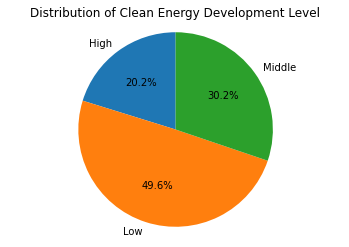

In [45]:
from pyspark.sql.functions import col, when, count, rand
import matplotlib.pyplot as plt

# Plot pie chart
df_pie_data = df_goal2.groupBy("Clean Energy Development Level").agg(count("*").alias("count")).collect()
labels = [row["Clean Energy Development Level"] for row in df_pie_data]
sizes = [row["count"] for row in df_pie_data]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Clean Energy Development Level")
plt.axis('equal')
plt.show()

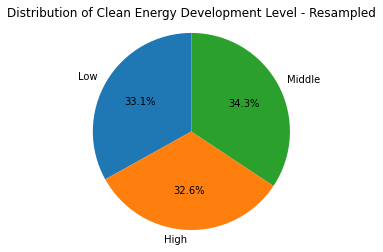

In [46]:
df_high = df_goal2.filter(col("Clean Energy Development Level") == "High")
df_middle = df_goal2.filter(col("Clean Energy Development Level") == "Middle")
df_low = df_goal2.filter(col("Clean Energy Development Level") == "Low")

# Count the number of 'Low' samples
num_low = df_low.count()

# Boost 'High' and 'Middle' samples to match the number of 'Low' samples
df_high_boosted = df_high.sample(withReplacement=True, fraction=num_low/df_high.count(), seed=123)
df_middle_boosted = df_middle.sample(withReplacement=True, fraction=num_low/df_middle.count(), seed=123)

df_goal2_boosted = df_low.union(df_high_boosted).union(df_middle_boosted)

# Plot pie chart
df_pie_data = df_goal2_boosted.groupBy("Clean Energy Development Level").agg(count("*").alias("count")).collect()
labels = [row["Clean Energy Development Level"] for row in df_pie_data]
sizes = [row["count"] for row in df_pie_data]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Clean Energy Development Level - Resampled")
plt.axis('equal')
plt.show()

## 5. Data-Mining Method(s) Selection
See on the report.

In [ ]:
See on the report.

## 6. Data-Mining Algorithm(s) Selection

### 6.1	Exploratory Analysis of Data-Mining Algorithms concerning DM Objectives

In [47]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

features_col = ['Total Fossil Fuels Production','Total Primary Energy Production']
label_col = 'Emission_Value'

assembler = VectorAssembler(inputCols=features_col, outputCol="features")
df_goal1_emission_transformed = assembler.transform(df_goal1_emission)

lr_goal1_emission = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_emission = lr_goal1_emission.fit(df_goal1_emission_transformed)

print("Intercept for df_goal1_emission: ", model_goal1_emission.intercept)
print("Coefficient for df_goal1_emission: ", model_goal1_emission.coefficients)
predictions_goal1_emission = model_goal1_emission.transform(df_goal1_emission_transformed)

23/10/12 18:28:15 WARN Instrumentation: [f3eb2c27] regParam is zero, which might cause numerical instability and overfitting.
23/10/12 18:28:15 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Intercept for df_goal1_emission:  6283.33465761634
Coefficient for df_goal1_emission:  [-2716.2392978476796,2454.1847994353025]


In [48]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator_goal1_emission = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_emission.evaluate(predictions_goal1_emission, {evaluator_goal1_emission.metricName: "r2"})
print("R-squared on df_goal1_emission = %g" % r2)

rmse = evaluator_goal1_emission.evaluate(predictions_goal1_emission, {evaluator_goal1_emission.metricName: "rmse"})
print("Root Mean Squared Error (RMSE) on df_goal1_emission = %g" % rmse)

mse = evaluator_goal1_emission.evaluate(predictions_goal1_emission, {evaluator_goal1_emission.metricName: "mse"})
print("Mean Squared Error (MSE) on df_goal1_emission = %g" % mse)

R-squared on df_goal1_emission = 0.926576
Root Mean Squared Error (RMSE) on df_goal1_emission = 1273.9
Mean Squared Error (MSE) on df_goal1_emission = 1.62283e+06


In [49]:
features_col = ['Emission_Value']
label_col = 'Lowess'

assembler = VectorAssembler(inputCols=features_col, outputCol="features")
df_goal1_lowess_transformed = assembler.transform(df_goal1_lowess)

lr_goal1_lowess = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_lowess = lr_goal1_lowess.fit(df_goal1_lowess_transformed)

print("Intercept for df_goal1_lowess: ", model_goal1_lowess.intercept)
print("Coefficient for df_goal1_lowess: ", model_goal1_lowess.coefficients)
predictions_goal1_lowess = model_goal1_lowess.transform(df_goal1_lowess_transformed)

23/10/12 18:28:23 WARN Instrumentation: [04ac7c6c] regParam is zero, which might cause numerical instability and overfitting.


Intercept for df_goal1_lowess:  -0.45296037576684606
Coefficient for df_goal1_lowess:  [3.7285671239388663e-05]


In [50]:
evaluator_goal1_lowess = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_lowess.evaluate(predictions_goal1_lowess, {evaluator_goal1_lowess.metricName: "r2"})
print("R-squared on df_goal1_lowess = %g" % r2)

rmse = evaluator_goal1_lowess.evaluate(predictions_goal1_lowess, {evaluator_goal1_lowess.metricName: "rmse"})
print("Root Mean Squared Error (RMSE) on df_goal1_lowess = %g" % rmse)

mse = evaluator_goal1_lowess.evaluate(predictions_goal1_lowess, {evaluator_goal1_lowess.metricName: "mse"})
print("Mean Squared Error (MSE) on df_goal1_lowess = %g" % mse)

R-squared on df_goal1_lowess = 0.905735
Root Mean Squared Error (RMSE) on df_goal1_lowess = 0.0565502
Mean Squared Error (MSE) on df_goal1_lowess = 0.00319792


In [51]:
features_col = ['Lowess']
label_col = 'Smoothed GMSL Variation (mm)'

assembler = VectorAssembler(inputCols=features_col, outputCol="features")
df_goal1_gmsl_transformed = assembler.transform(df_goal1_gmsl)

lr_goal1_gmsl = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_gmsl = lr_goal1_gmsl.fit(df_goal1_gmsl_transformed)

print("Intercept for df_goal1_gmsl: ", model_goal1_gmsl.intercept)
print("Coefficient for df_goal1_gmsl: ", model_goal1_gmsl.coefficients)
predictions_goal1_gmsl = model_goal1_gmsl.transform(df_goal1_gmsl_transformed)

23/10/12 18:28:31 WARN Instrumentation: [041c5b61] regParam is zero, which might cause numerical instability and overfitting.


Intercept for df_goal1_gmsl:  -88.36325391878856
Coefficient for df_goal1_gmsl:  [153.14014050765562]


In [52]:
evaluator_goal1_gmsl = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_gmsl.evaluate(predictions_goal1_gmsl, {evaluator_goal1_gmsl.metricName: "r2"})
print("R-squared on df_goal1_gmsl = %g" % r2)

rmse = evaluator_goal1_gmsl.evaluate(predictions_goal1_gmsl, {evaluator_goal1_gmsl.metricName: "rmse"})
print("Root Mean Squared Error (RMSE) on df_goal1_gmsl = %g" % rmse)

mse = evaluator_goal1_gmsl.evaluate(predictions_goal1_gmsl, {evaluator_goal1_gmsl.metricName: "mse"})
print("Mean Squared Error (MSE) on df_goal1_gmsl = %g" % mse)

R-squared on df_goal1_gmsl = 0.977946
Root Mean Squared Error (RMSE) on df_goal1_gmsl = 4.2358
Mean Squared Error (MSE) on df_goal1_gmsl = 17.942


In [53]:
df_goal2 = df_goal2_boosted

indexer = StringIndexer(inputCol="Clean Energy Development Level", outputCol="label")
indexer_model = indexer.fit(df_goal2)
df_goal2 = indexer_model.transform(df_goal2)

In [54]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

assembler = VectorAssembler(
    inputCols=[x for x in df_goal2.columns if x not in ["Entity", "label", "Clean Energy Development Level"]],
    outputCol="features"
)
df_goal2_r = assembler.transform(df_goal2)

lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(df_goal2_r)
print(lr_model.interceptVector, lr_model.coefficientMatrix)

[-0.04246074783706799,-1.658615467797687,1.701076215634755] DenseMatrix([[ 9.07354580e-03, -8.05622623e-03,  3.60642609e-03,
               9.00327351e-02,  3.91069823e-02,  9.94857465e-03,
              -7.21465822e-06],
             [ 1.68757092e-02,  2.05685729e-02, -1.08694229e-02,
               1.56642379e-01, -2.95874627e-02, -1.23345199e-01,
               5.11109204e-06],
             [-2.59492550e-02, -1.25123467e-02,  7.26299678e-03,
              -2.46675115e-01, -9.51951955e-03,  1.13396625e-01,
               2.10356617e-06]])


In [134]:
predictions_lr = lr_model.transform(df_goal2_r)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_lr)
print("Accuracy = %g" % accuracy)

labels = indexer_model.labels
metrics = MulticlassMetrics(predictions_lr.select("prediction", "label").rdd)
matrix = metrics.confusionMatrix().toArray()
df_cm = pd.DataFrame(matrix, index=labels, columns=labels)
print(df_cm)

print()

df_cm = pd.DataFrame(matrix_mlp, index=labels, columns=labels)
df_cm_percentage = df_cm.divide(df_cm.sum(axis=1), axis=0)
print(df_cm_percentage)

Accuracy = 0.769682


D:\UoA\IS722\ITERATION 4 DBAS\spark-3.2.4-bin-hadoop3.2\python\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


        Middle     Low    High
Middle  1159.0   163.0   434.0
Low      220.0  1400.0    73.0
High     289.0     0.0  1381.0

          Middle       Low      High
Middle  0.941048  0.058952  0.000000
Low     0.032443  0.925573  0.041985
High    0.000000  0.030000  0.970000


In [55]:
df_goal2 = df_goal2_boosted.drop('Primary energy consumption per capita (kWh/person)')

In [56]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.classification import MultilayerPerceptronClassifier

indexer = StringIndexer(inputCol="Clean Energy Development Level", outputCol="label")
indexer_model = indexer.fit(df_goal2)
df_goal2_indexed = indexer_model.transform(df_goal2)

entity_indexer = StringIndexer(inputCol="Entity", outputCol="EntityIndex")
entity_index_model = entity_indexer.fit(df_goal2_indexed)
df_goal2_indexed = entity_index_model.transform(df_goal2_indexed)

assembler = VectorAssembler(
    inputCols=[x for x in df_goal2_indexed.columns if x not in ["Entity", "label", "Clean Energy Development Level"]],
    outputCol="features"
)
df_goal2_transformed = assembler.transform(df_goal2_indexed)

layers = [len(assembler.getInputCols()), 200, len(indexer_model.labels)]

mlp = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", 
                                     maxIter=200, layers=layers, blockSize=128, seed=1234)
mlp_model = mlp.fit(df_goal2_transformed)

23/10/12 18:28:56 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/10/12 18:28:56 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [57]:
predictions_mlp = mlp_model.transform(df_goal2_transformed)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_mlp = evaluator.evaluate(predictions_mlp)
print("MLP Accuracy = %g" % accuracy_mlp)

labels = indexer_model.labels
metrics_mlp = MulticlassMetrics(predictions_mlp.select("prediction", "label").rdd)
matrix_mlp = metrics_mlp.confusionMatrix().toArray()
df_cm = pd.DataFrame(matrix_mlp, index=labels, columns=labels)
print(df_cm)

print()

df_cm = pd.DataFrame(matrix_mlp, index=labels, columns=labels)
df_cm_percentage = df_cm.divide(df_cm.sum(axis=1), axis=0)
print(df_cm_percentage)

MLP Accuracy = 0.9748


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


        Middle     Low    High
Middle  1694.0    28.0    34.0
Low       40.0  1652.0     1.0
High      26.0     0.0  1644.0

          Middle       Low      High
Middle  0.964692  0.015945  0.019362
Low     0.023627  0.975783  0.000591
High    0.015569  0.000000  0.984431


In [58]:
print(df_goal2_transformed.select("features").head(1)[0])

Row(features=DenseVector([98.9731, 97.1, 8.91, 23.84, 0.0, 0.05, 99.0]))


### 6.2 Selecting Algorithm(s) based on Discussion and Exploratory Analysis
See on the report.

### 6.3 Building/Selecting Model with Algorithm/Model Parameter(s)

In [60]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

paramGrid = ParamGridBuilder() \
    .addGrid(mlp.layers, [[7, 50, 3], [7, 100, 3], [7, 200, 3]]) \
    .addGrid(mlp.maxIter, [50, 100, 200]) \
    .build()
    
crossval = CrossValidator(estimator=mlp,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=3)

cvModel = crossval.fit(df_goal2_transformed)

bestModel = cvModel.bestModel
print("Best parameters for MLP:", bestModel.extractParamMap())

Best parameters for MLP: {Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='blockSize', doc='block size for stacking input data in matrices. Data is stacked within partitions. If block size is more than remaining data in a partition then it is adjusted to the size of this data.'): 128, Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='featuresCol', doc='features column name.'): 'features', Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='labelCol', doc='label column name.'): 'label', Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='maxIter', doc='max number of iterations (>= 0).'): 200, Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='predictionCol', doc='prediction column name.'): 'prediction', Param(parent='MultilayerPerceptronClassifier_8357d0820951', name='probabilityCol', doc='Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates

## 7. Data Mining

### 7.1 Logical Test(s) Creation

In [59]:
from pyspark.sql import SparkSession

# Split for df_goal1_emission
train_goal1_emission, test_goal1_emission = df_goal1_emission.randomSplit([0.8, 0.2], seed=42)

# Split for df_goal1_lowess
train_goal1_lowess, test_goal1_lowess = df_goal1_lowess.randomSplit([0.8, 0.2], seed=42)

# Split for df_goal1_gmsl
train_goal1_gmsl, test_goal1_gmsl = df_goal1_gmsl.randomSplit([0.8, 0.2], seed=42)

In [60]:
df_goal2 = df_goal2_boosted.drop('Primary energy consumption per capita (kWh/person)')
# Split for df_goal2
train_goal2, test_goal2 = df_goal2.randomSplit([0.7, 0.3], seed=42)

### 7.2 Data Mining Conduction

#### 7.2.1 Models for Analysis of Carbon Emissions and Their Environmental Impact

In [61]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

features_col = ['Total Fossil Fuels Production','Total Primary Energy Production']
label_col = 'Emission_Value'

# Transform training data
assembler = VectorAssembler(inputCols=features_col, outputCol="features")
train_goal1_emission_transformed = assembler.transform(train_goal1_emission)

# Fit the model on training data
lr_goal1_emission = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_emission = lr_goal1_emission.fit(train_goal1_emission_transformed)

print("Intercept for df_goal1_emission: ", model_goal1_emission.intercept)
print("Coefficient for df_goal1_emission: ", model_goal1_emission.coefficients)

# Transform test data and get predictions
test_goal1_emission_transformed = assembler.transform(test_goal1_emission)
predictions_goal1_emission = model_goal1_emission.transform(test_goal1_emission_transformed)

from pyspark.ml.evaluation import RegressionEvaluator

evaluator_goal1_emission = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_emission.evaluate(predictions_goal1_emission, {evaluator_goal1_emission.metricName: "r2"})
print("R-squared on test data of df_goal1_emission = %g" % r2)

correlation = predictions_goal1_emission.stat.corr(label_col, "prediction")
print(f"Linear Correlation between actual and predicted values for test data of df_goal1_emission: {correlation}")

23/10/12 18:30:27 WARN Instrumentation: [3568d876] regParam is zero, which might cause numerical instability and overfitting.


Intercept for df_goal1_emission:  6348.093443542475
Coefficient for df_goal1_emission:  [-2623.1958609387334,2377.4765574057315]
R-squared on test data of df_goal1_emission = 0.823887
Linear Correlation between actual and predicted values for test data of df_goal1_emission: 0.9522530503224923


In [62]:
features_col = ['Emission_Value']
label_col = 'Lowess'

# Transform training data
assembler = VectorAssembler(inputCols=features_col, outputCol="features")
train_goal1_lowess_transformed = assembler.transform(train_goal1_lowess)

# Fit the model on training data
lr_goal1_lowess = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_lowess = lr_goal1_lowess.fit(train_goal1_lowess_transformed)

print("Intercept for df_goal1_lowess: ", model_goal1_lowess.intercept)
print("Coefficient for df_goal1_lowess: ", model_goal1_lowess.coefficients)

# Transform test data and get predictions
test_goal1_lowess_transformed = assembler.transform(test_goal1_lowess)
predictions_goal1_lowess = model_goal1_lowess.transform(test_goal1_lowess_transformed)

evaluator_goal1_lowess = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_lowess.evaluate(predictions_goal1_lowess, {evaluator_goal1_lowess.metricName: "r2"})
print("R-squared on test data of df_goal1_lowess = %g" % r2)

correlation = predictions_goal1_lowess.stat.corr(label_col, "prediction")
print(f"Linear Correlation between actual and predicted values for test data of df_goal1_lowess: {correlation}")

23/10/12 18:30:33 WARN Instrumentation: [c634919a] regParam is zero, which might cause numerical instability and overfitting.


Intercept for df_goal1_lowess:  -0.4878423143070284
Coefficient for df_goal1_lowess:  [3.854242174563036e-05]
R-squared on test data of df_goal1_lowess = 0.862865
Linear Correlation between actual and predicted values for test data of df_goal1_lowess: 0.9545577879367314


In [63]:
features_col = ['Lowess']
label_col = 'Smoothed GMSL Variation (mm)'

# Transform training data
assembler = VectorAssembler(inputCols=features_col, outputCol="features")
train_goal1_gmsl_transformed = assembler.transform(train_goal1_gmsl)

# Fit the model on training data
lr_goal1_gmsl = LinearRegression(featuresCol="features", labelCol=label_col)
model_goal1_gmsl = lr_goal1_gmsl.fit(train_goal1_gmsl_transformed)

print("Intercept for df_goal1_gmsl: ", model_goal1_gmsl.intercept)
print("Coefficient for df_goal1_gmsl: ", model_goal1_gmsl.coefficients)

# Transform test data and get predictions
test_goal1_gmsl_transformed = assembler.transform(test_goal1_gmsl)
predictions_goal1_gmsl = model_goal1_gmsl.transform(test_goal1_gmsl_transformed)

evaluator_goal1_gmsl = RegressionEvaluator(labelCol=label_col, predictionCol="prediction")

r2 = evaluator_goal1_gmsl.evaluate(predictions_goal1_gmsl, {evaluator_goal1_gmsl.metricName: "r2"})
print("R-squared on test data of df_goal1_gmsl = %g" % r2)

correlation = predictions_goal1_gmsl.stat.corr(label_col, "prediction")
print(f"Linear Correlation between actual and predicted values for test data of df_goal1_gmsl: {correlation}")

23/10/12 18:30:36 WARN Instrumentation: [f8034f52] regParam is zero, which might cause numerical instability and overfitting.


Intercept for df_goal1_gmsl:  -88.63318827549342
Coefficient for df_goal1_gmsl:  [153.48721893400523]
R-squared on test data of df_goal1_gmsl = 0.9758
Linear Correlation between actual and predicted values for test data of df_goal1_gmsl: 0.9879372340107965


#### 7.2.2 Models for Assessment and Categorization of Global and Regional Clean Energy Development

In [64]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import pandas as pd

# Indexing and Assembling
indexer = StringIndexer(inputCol="Clean Energy Development Level", outputCol="label")
indexer_model = indexer.fit(train_goal2)
train_goal2_indexed = indexer_model.transform(train_goal2)
test_goal2_indexed = indexer_model.transform(test_goal2)

entity_indexer = StringIndexer(inputCol="Entity", outputCol="EntityIndex")
entity_index_model = entity_indexer.fit(train_goal2_indexed)
train_goal2_indexed = entity_index_model.transform(train_goal2_indexed)
test_goal2_indexed = entity_index_model.transform(test_goal2_indexed)

assembler = VectorAssembler(
    inputCols=[x for x in train_goal2_indexed.columns if x not in ["Entity", "label", "Clean Energy Development Level"]],
    outputCol="features"
)
train_goal2_transformed = assembler.transform(train_goal2_indexed)
test_goal2_transformed = assembler.transform(test_goal2_indexed)

# Defining layers and training the MLP model
layers = [len(assembler.getInputCols()), 200, len(indexer_model.labels)]

mlp = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", 
                                     maxIter=200, layers=layers, blockSize=128, seed=1234)
mlp_model = mlp.fit(train_goal2_transformed)

predictions_mlp = mlp_model.transform(test_goal2_transformed)

In [65]:
weights = mlp_model.weights.toArray()
print(f"MLP weights = {weights}")

# Evaluating Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_mlp = evaluator.evaluate(predictions_mlp)
print("MLP Accuracy on Test Data = %g" % accuracy_mlp)

# Confusion Matrix
labels = indexer_model.labels
metrics_mlp = MulticlassMetrics(predictions_mlp.select("prediction", "label").rdd)
matrix_mlp = metrics_mlp.confusionMatrix().toArray()
df_cm = pd.DataFrame(matrix_mlp, index=labels, columns=labels)
print(df_cm)
print()

df_cm_percentage = df_cm.divide(df_cm.sum(axis=1), axis=0)
print(df_cm_percentage)

MLP weights = [ 0.4035099   0.86719662 -0.54451084 ... -0.23972798  0.21331436
 -0.17574296]
MLP Accuracy on Test Data = 0.948718


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


          Low  Middle   High
Low     431.0    26.0    1.0
Middle   14.0   489.0   21.0
High      0.0    14.0  486.0

             Low    Middle      High
Low     0.941048  0.056769  0.002183
Middle  0.026718  0.933206  0.040076
High    0.000000  0.028000  0.972000


In [66]:
n_layers = len(layers)
activation_function = "sigmoid"

print("Neural Network Structure:\n")
print("Layer | Type       | Size | Activation Function")
print("------|------------|------|---------------------")
print(f"0     | Input     | {layers[0]}   | -")
for i in range(1, n_layers - 1):
    print(f"{i}     | Hidden    | {layers[i]}   | {activation_function}")
print(f"{n_layers - 1}     | Output    | {layers[-1]}   | -")

Neural Network Structure:

Layer | Type       | Size | Activation Function
------|------------|------|---------------------
0     | Input     | 7   | -
1     | Hidden    | 200   | sigmoid
2     | Output    | 3   | -


## 8. Interpretation

### 8.2 Visualision of the Data, Result, Methods and Patterns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting the values for plotting
X_train_array = np.array(train_goal1_emission.select('Total Fossil Fuels Production').rdd.flatMap(lambda x: x).collect())
Y_train_original = np.array(train_goal1_emission.select('Emission_Value').rdd.flatMap(lambda x: x).collect())

X_test_array = np.array(predictions_goal1_emission.select('Total Fossil Fuels Production').rdd.flatMap(lambda x: x).collect())
predictions_array = np.array(predictions_goal1_emission.select('Emission_Value').rdd.flatMap(lambda x: x).collect())

# Plotting
plt.scatter(X_train_array, Y_train_original, color='blue', label='Original data')
plt.plot(X_test_array, predictions_array, color='red', label='Regression line')

plt.title("Total Fossil Fuels Production v. Emission Value")
plt.xlabel("Total Fossil Fuels Production")
plt.ylabel("Emission Value")
plt.legend()
plt.show()

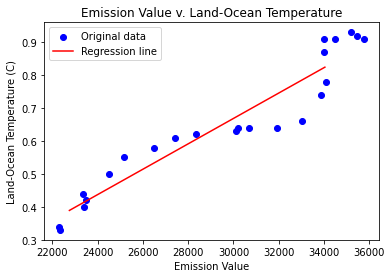

In [68]:
# Extracting the values for plotting
X_train_array = np.array(train_goal1_lowess.select('Emission_Value').rdd.flatMap(lambda x: x).collect())
Y_train_original = np.array(train_goal1_lowess.select('Lowess').rdd.flatMap(lambda x: x).collect())

X_test_array = np.array(predictions_goal1_lowess.select('Emission_Value').rdd.flatMap(lambda x: x).collect())
predictions_array = np.array(predictions_goal1_lowess.select('prediction').rdd.flatMap(lambda x: x).collect())

# Plotting
plt.scatter(X_train_array, Y_train_original, color='blue', label='Original data')
plt.plot(X_test_array, predictions_array, color='red', label='Regression line')

plt.title("Emission Value v. Land-Ocean Temperature")
plt.xlabel("Emission Value")
plt.ylabel("Land-Ocean Temperature (C)")
plt.legend()
plt.show()

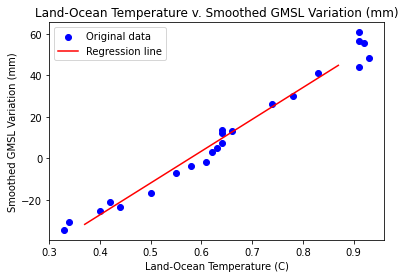

In [69]:
# Extracting the values for plotting
X_train_array = np.array(train_goal1_gmsl.select('Lowess').rdd.flatMap(lambda x: x).collect())
Y_train_original = np.array(train_goal1_gmsl.select('Smoothed GMSL Variation (mm)').rdd.flatMap(lambda x: x).collect())

X_test_array = np.array(predictions_goal1_gmsl.select('Lowess').rdd.flatMap(lambda x: x).collect())
predictions_array = np.array(predictions_goal1_gmsl.select('prediction').rdd.flatMap(lambda x: x).collect())

# Plotting
plt.scatter(X_train_array, Y_train_original, color='blue', label='Original data')
plt.plot(X_test_array, predictions_array, color='red', label='Regression line')

plt.title("Land-Ocean Temperature v. Smoothed GMSL Variation (mm)")
plt.xlabel("Land-Ocean Temperature (C)")
plt.ylabel("Smoothed GMSL Variation (mm)")
plt.legend()
plt.show()

In [70]:
from pyspark.ml.feature import IndexToString

converter = IndexToString(inputCol="label", outputCol="Original_Clean_Energy_Development_Level", labels=indexer_model.labels)
train_goal2_converted = converter.transform(train_goal2_transformed)

/tmp/ipykernel_1213/2473108317.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


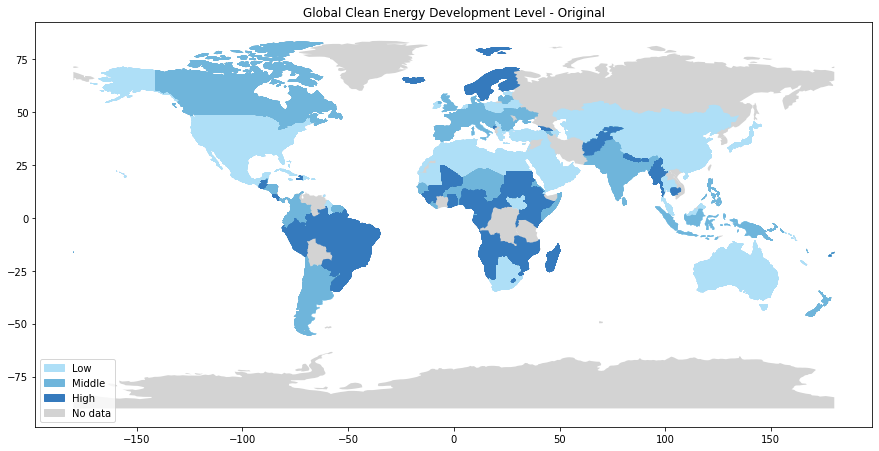

In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyspark.sql import functions as F

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

data = train_goal2_converted.select(
    F.col('Entity').alias('country'),
    F.col('Original_Clean_Energy_Development_Level').alias('level')
)

countries_data = data.select('country').rdd.flatMap(lambda x: x).collect()
countries_world = world['name'].tolist()

unmatched_countries_in_data = [country for country in countries_data if country not in countries_world]
unmatched_countries_in_world = [country for country in countries_world if country not in countries_data]

country_mapping = {
    "United States": "United States of America",
    "Dominican Republic": "Dominican Rep.",
    "Central African Republic": "Central African Rep.",
    "Equatorial Guinea": "Eq. Guinea",
    "Eswatini": "eSwatini",
    "Solomon Islands": "Solomon Is.",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "South Sudan": "S. Sudan"
}

# Convert PySpark DataFrame to Pandas DataFrame
data_pd = data.toPandas()

# Replace country names based on mapping
data_pd['country'] = data_pd['country'].replace(country_mapping)

# Merge with world GeoDataFrame
world = world.merge(data_pd, left_on="name", right_on="country", how="left")

# Fill NaN values
world['level'].fillna('No data', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world[world['level'] == 'Low'].plot(ax=ax, color='#AEDFF7', legend=True)
world[world['level'] == 'Middle'].plot(ax=ax, color='#6FB5DB', legend=True)
world[world['level'] == 'High'].plot(ax=ax, color='#357ABD', legend=True)
world[world['level'] == 'No data'].plot(ax=ax, color='lightgrey')

# Legend
light_blue_patch = mpatches.Patch(color='#AEDFF7', label='Low')
medium_blue_patch = mpatches.Patch(color='#6FB5DB', label='Middle')
dark_blue_patch = mpatches.Patch(color='#357ABD', label='High')
grey_patch = mpatches.Patch(color='lightgrey', label='No data')

ax.legend(handles=[light_blue_patch, medium_blue_patch, dark_blue_patch, grey_patch], loc='lower left')

ax.set_title("Global Clean Energy Development Level - Original")
plt.show()

In [73]:
from pyspark.ml.feature import IndexToString

converter = IndexToString(inputCol="label", outputCol="Original_Clean_Energy_Development_Level", labels=indexer_model.labels)
predictions_mlp_converted = converter.transform(predictions_mlp)

/tmp/ipykernel_1213/501264643.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


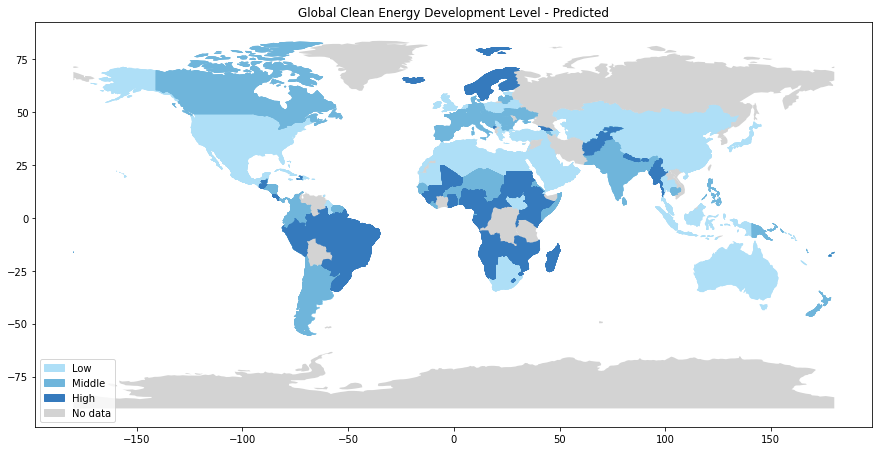

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyspark.sql import functions as F

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

data = predictions_mlp_converted.select(
    F.col('Entity').alias('country'),
    F.col('Original_Clean_Energy_Development_Level').alias('level')
)

countries_data = data.select('country').rdd.flatMap(lambda x: x).collect()
countries_world = world['name'].tolist()

unmatched_countries_in_data = [country for country in countries_data if country not in countries_world]
unmatched_countries_in_world = [country for country in countries_world if country not in countries_data]

country_mapping = {
    "United States": "United States of America",
    "Dominican Republic": "Dominican Rep.",
    "Central African Republic": "Central African Rep.",
    "Equatorial Guinea": "Eq. Guinea",
    "Eswatini": "eSwatini",
    "Solomon Islands": "Solomon Is.",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "South Sudan": "S. Sudan"
}

# Convert PySpark DataFrame to Pandas DataFrame
data_pd = data.toPandas()

# Replace country names based on mapping
data_pd['country'] = data_pd['country'].replace(country_mapping)

# Merge with world GeoDataFrame
world = world.merge(data_pd, left_on="name", right_on="country", how="left")

# Fill NaN values
world['level'].fillna('No data', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world[world['level'] == 'Low'].plot(ax=ax, color='#AEDFF7', legend=True)
world[world['level'] == 'Middle'].plot(ax=ax, color='#6FB5DB', legend=True)
world[world['level'] == 'High'].plot(ax=ax, color='#357ABD', legend=True)
world[world['level'] == 'No data'].plot(ax=ax, color='lightgrey')

# Legend
light_blue_patch = mpatches.Patch(color='#AEDFF7', label='Low')
medium_blue_patch = mpatches.Patch(color='#6FB5DB', label='Middle')
dark_blue_patch = mpatches.Patch(color='#357ABD', label='High')
grey_patch = mpatches.Patch(color='lightgrey', label='No data')

ax.legend(handles=[light_blue_patch, medium_blue_patch, dark_blue_patch, grey_patch], loc='lower left')

ax.set_title("Global Clean Energy Development Level - Predicted")
plt.show()

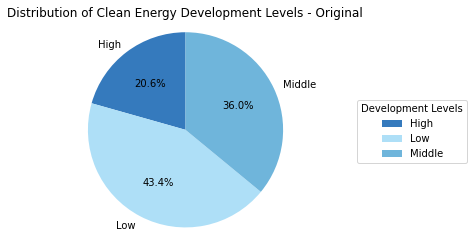

In [75]:
data = train_goal2_converted.select(
    F.col('Entity').alias('country'),
    F.col('Original_Clean_Energy_Development_Level').alias('level')
)

# Distinct rows based on country
unique_data = data.distinct()

# Calculate level counts
level_counts_df = unique_data.groupBy("level").count().collect()

# Convert level_counts_df to dictionary for easier processing
level_counts = {row['level']: row['count'] for row in level_counts_df}

colors = {'Low': '#AEDFF7', 'Middle': '#6FB5DB', 'High': '#357ABD'}

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(level_counts.values(), 
                                  labels=level_counts.keys(), 
                                  startangle=90, 
                                  autopct='%1.1f%%',
                                  colors=[colors[key] for key in level_counts.keys()])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title("Distribution of Clean Energy Development Levels - Original")
ax.legend(wedges, level_counts.keys(), 
          title="Development Levels", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

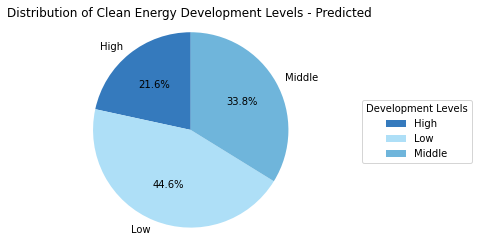

In [76]:
data = predictions_mlp_converted.select(
    F.col('Entity').alias('country'),
    F.col('Original_Clean_Energy_Development_Level').alias('level')
)

# Distinct rows based on country
unique_data = data.distinct()

# Calculate level counts
level_counts_df = unique_data.groupBy("level").count().collect()

# Convert level_counts_df to dictionary for easier processing
level_counts = {row['level']: row['count'] for row in level_counts_df}

colors = {'Low': '#AEDFF7', 'Middle': '#6FB5DB', 'High': '#357ABD'}

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(level_counts.values(), 
                                  labels=level_counts.keys(), 
                                  startangle=90, 
                                  autopct='%1.1f%%',
                                  colors=[colors[key] for key in level_counts.keys()])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title("Distribution of Clean Energy Development Levels - Predicted")
ax.legend(wedges, level_counts.keys(), 
          title="Development Levels", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### 8.4 Assessment and Evaluation of the Results, Models and Patterns

In [77]:
def cumulative_plot(y_true, y_pred):
    # Convert y_true and y_pred to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    sorted_indices = np.argsort(y_pred)
    sorted_y_true = y_true[sorted_indices]
    sorted_y_pred = y_pred[sorted_indices]
    
    cum_y_true = np.cumsum(sorted_y_true)
    cum_y_pred = np.cumsum(sorted_y_pred)

    plt.plot(cum_y_pred, label='Predicted')
    plt.plot(cum_y_true, linestyle='--', label='Actual')
    
    plt.xlabel('Number of Observations')
    plt.ylabel('Cumulative Value')
    plt.title('Cumulative Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

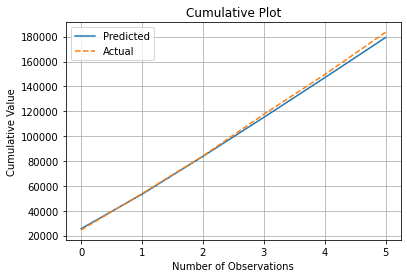

In [78]:
# Extract the values from the DataFrame
y_true_list = predictions_goal1_emission.select(F.col('Emission_Value')).rdd.flatMap(lambda x: x).collect()
y_pred_list = predictions_goal1_emission.select(F.col('prediction')).rdd.flatMap(lambda x: x).collect()

# Call the function
cumulative_plot(y_true_list, y_pred_list)

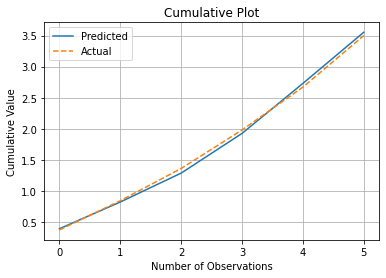

In [79]:
# Extract the values from the DataFrame
y_true_list = predictions_goal1_lowess.select(F.col('Lowess')).rdd.flatMap(lambda x: x).collect()
y_pred_list = predictions_goal1_lowess.select(F.col('prediction')).rdd.flatMap(lambda x: x).collect()

# Call the function
cumulative_plot(y_true_list, y_pred_list)

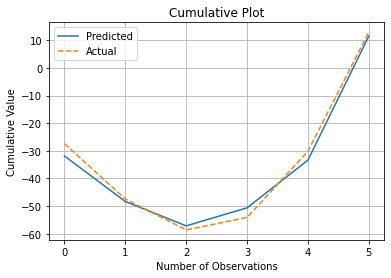

In [80]:
# Extract the values from the DataFrame
y_true_list = predictions_goal1_gmsl.select(F.col('Smoothed GMSL Variation (mm)')).rdd.flatMap(lambda x: x).collect()
y_pred_list = predictions_goal1_gmsl.select(F.col('prediction')).rdd.flatMap(lambda x: x).collect()

# Call the function
cumulative_plot(y_true_list, y_pred_list)

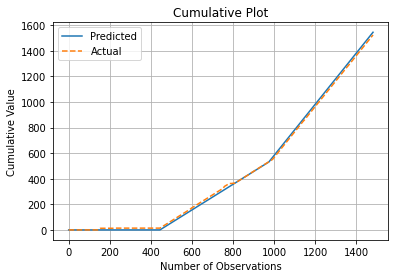

In [81]:
# Extract the values from the DataFrame
y_true_list = predictions_mlp_converted.select(F.col('label')).rdd.flatMap(lambda x: x).collect()
y_pred_list = predictions_mlp_converted.select(F.col('prediction')).rdd.flatMap(lambda x: x).collect()

# Call the function
cumulative_plot(y_true_list, y_pred_list)